# Image Processing 10mm Rods

Import packages.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random as rng

Read image and convert to grayscale.

In [2]:
img = cv.imread('10mm Rods - Dark JPG.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Cropped the ruler out from the image because it was messing with the binarization.

In [3]:
img = img[0:1734,:]

Binarize the image with adaptive threshold.

In [4]:
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,401,-4)

Erode the image.

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
th2 = cv.erode(th2, kernel, iterations=1)

True

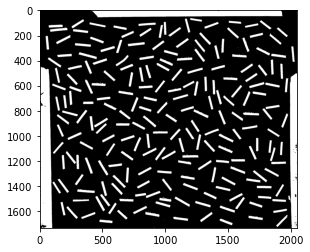

In [6]:
plt.imshow(th2,'gray')
cv.imwrite('threshImage10mm.png', th2)

Find the contours.

In [7]:
contours, hierarchy = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

Go through each of the contours, find the minimum area rectangle bounding each contour, and store the largest dimension of the rectangles (representing the length of the rod particle). Make sure to ignore background noise or masking tape readings.

In [8]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
rng.seed(12345)

minRect = [None]*len(contours)
lengths = [None]*len(contours)

# find rod lengths of the particles
for i, c in enumerate(contours):
    if c.shape[0] > 10:
        minRectTemp = cv.minAreaRect(c)
        length = max(minRectTemp[1])
        width = min(minRectTemp[1])
        if length < 200.0 and length > 50.0 and length/width > 3:
            minRect[i] = minRectTemp
            lengths[i] = length
        
# Draw the rectangle boundaries
for i, c in enumerate(contours):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    box = cv.boxPoints(minRect[i])
    box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
    cv.drawContours(img_color, [box], 0, color)
    
cv.imshow('Contours', img_color)

True

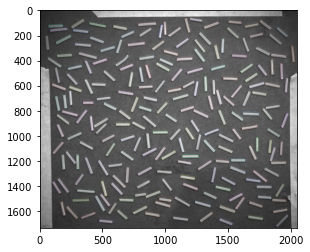

In [9]:
plt.imshow(img_color)
cv.imwrite('shapeImage10mm.png', img_color)

Remove the "None" values in the "lengths" array. The None values are unrecorded lengths of noise and masking tape boundary rectangles.

In [10]:
raw_lengths = list(filter(lambda item: item is not None, lengths))

Convert the raw lengths from pixels to cm. I used Paint to find the conversion value from pixels to cm, and then multiplied the value by 10 to convert from cm to mm.

In [11]:
PixelsInMM = 170/1852

In [12]:
lengths_mm = np.multiply(raw_lengths,PixelsInMM)

Find the number of particles in the sample.

In [13]:
lengths_mm.size

217

Find the sample mean.

In [14]:
np.mean(lengths_mm)

10.62845659769026

Find the sample standard deviation.

In [15]:
np.std(lengths_mm)

0.861242666639875

Plot a histogram of the 10mm rod lengths.

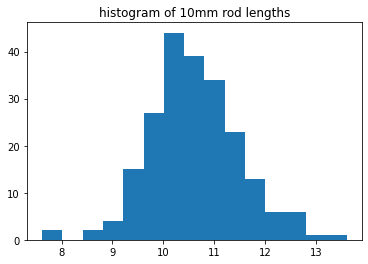

In [16]:
plt.hist(lengths_mm,bins=15) 
plt.title("histogram of 10mm rod lengths") 
plt.show()